# Harmonic-Percussive Source Separation (HPSS)

HPSS is a technique used to decompose an audio signal into its harmonic and percussive components. The harmonic component generally contains the tonal aspects of the audio (e.g., melody, chords), while the percussive component captures transient and rhythmic elements (e.g., drums, hits).

The separation of these components is useful for various applications, including:

- **Music Analysis:** Isolating melody from rhythm, which can help in tasks like chord extraction and beat tracking.
- **Music Production:** Manipulating or remixing specific elements of a track.
- **Audio Enhancement:** Enhancing or suppressing specific aspects of a recording.


HPSS generally uses the following approach:

**1. Spectrogram Analysis: Compute the spectrogram of the audio signal with STFT.**


$STFT(t, f) = \Sigma_{n=-\infty}^{\infty} x[n] \cdot w[n-t] \cdot e^{-j2\pi fn/N}$

$S(t, f) = S_h(t, f) + S_p(t, f)$


The harmonic component captures the tonal aspects and is characterized by smooth, periodic changes. The harmonic spectrogram is computed by:

$S_h(t, f) = median_{time}(STFT(t, f))$

$S_h(t, f) = STFT(t, f) - S_h(t, f)$

The percussive component captures the transient, rhythmic aspects. The percussive spectrogram is computed by:

$S_p(t, f) = STFT(t, f) - S_h(t, f)$ 


**2. Temporal Modulation: Use temporal modulations to distinguish between harmonic and percussive components.**

- Spectral Modulation: Filters out the periodic components to isolate the harmonic content.
- Temporal Modulation: Uses median filtering over time to separate out percussive transients.

**3. Reconstruction: Reconstruct the harmonic and percussive components from the separated spectrograms.**

$y_h(t) = Inverse STFT(S_h(t, f))$

$y_p(t) = Inverse STFT(S_p(t, f))$

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import librosa
import librosa.display

In [4]:
import sounddevice as sd

In [5]:
# Load an example audio file
audio_path = librosa.example('choice')
y, sr = librosa.load(audio_path, sr=None)

In [6]:
# Compute Harmonic and Percussive components
harmonic, percussive = librosa.effects.hpss(y)

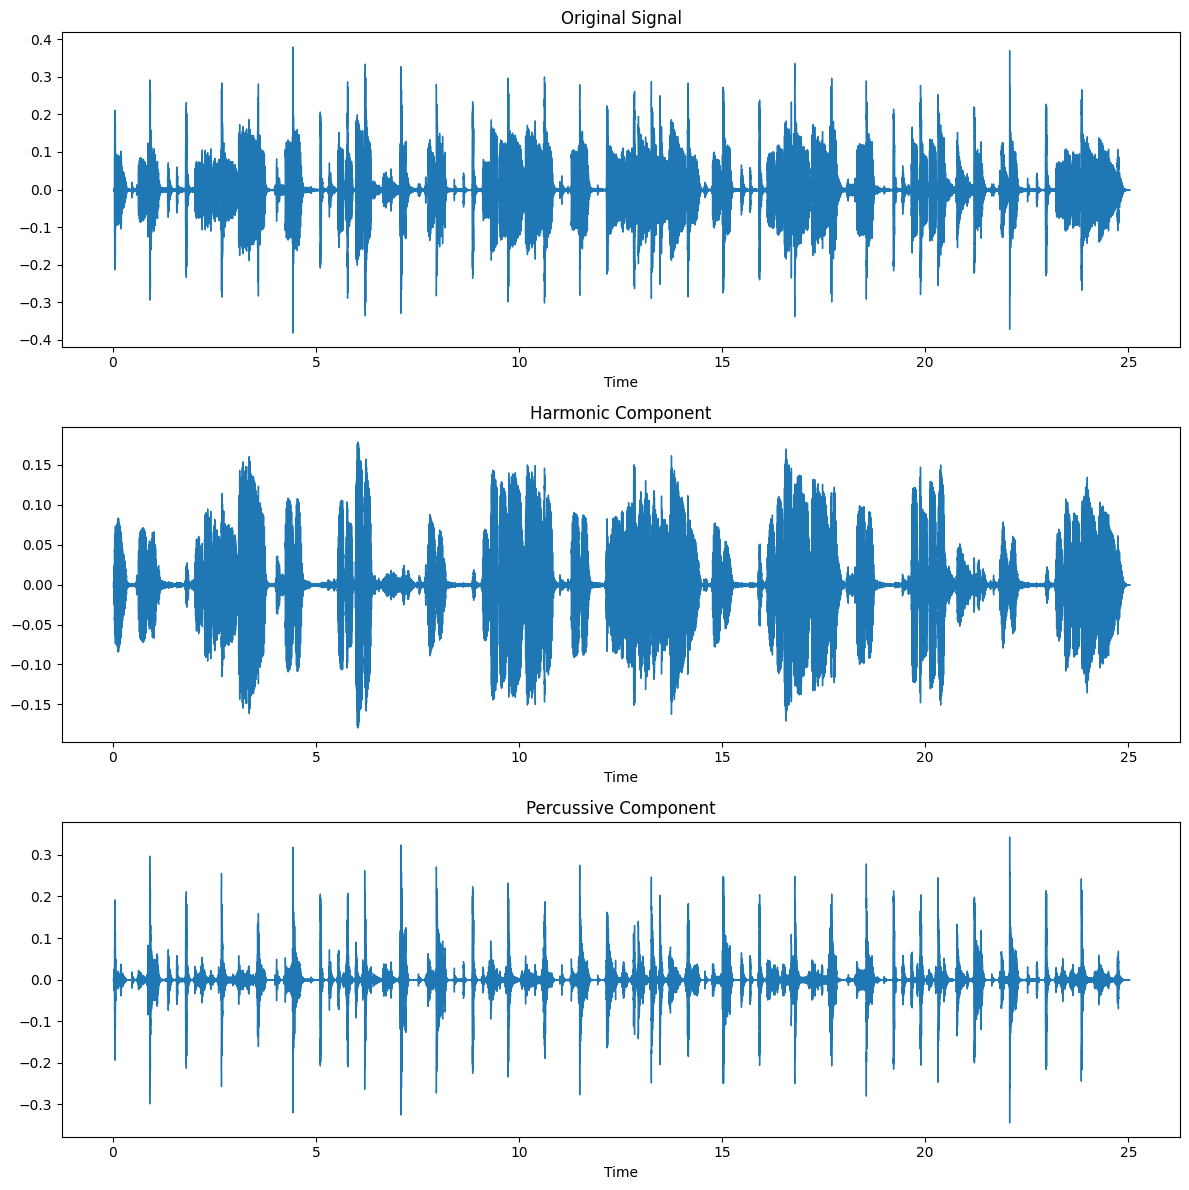

In [7]:
# Plot the original, harmonic, and percussive components
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Original Signal
librosa.display.waveshow(y, sr=sr, ax=axs[0])
axs[0].set_title('Original Signal')

# Harmonic Component
librosa.display.waveshow(harmonic, sr=sr, ax=axs[1])
axs[1].set_title('Harmonic Component')

# Percussive Component
librosa.display.waveshow(percussive, sr=sr, ax=axs[2])
axs[2].set_title('Percussive Component')

plt.tight_layout()
plt.show()

In [8]:
sd.play(y, samplerate=sr)

In [36]:
sd.play(percussive, samplerate=sr)

In [38]:
sd.play(harmonic, samplerate=sr)

In [9]:
sd.stop()

---

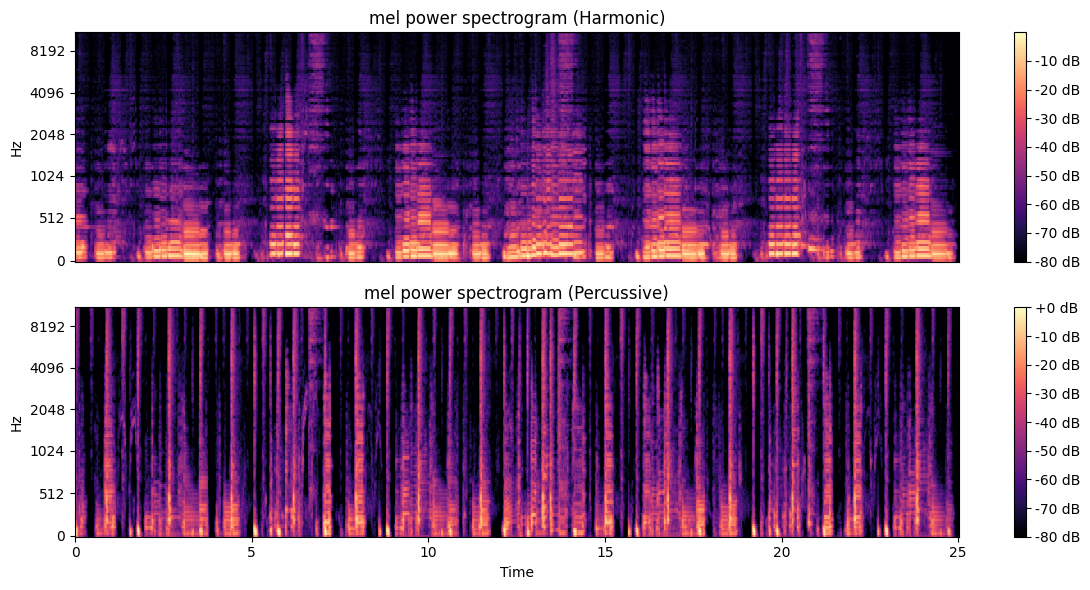

In [12]:
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y=harmonic, sr=sr, n_fft=2048, hop_length=512, n_mels=128, fmax=8000)
S_percussive = librosa.feature.melspectrogram(y=percussive, sr=sr, n_fft=2048, hop_length=512, n_mels=128, fmax=8000)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()